## 水汽通量公式  
$\vec{F_v}|_p = \frac{q}{g} \vec{V}$  
$F_{av} = \int_{0}^{p_0} F(p) dp\$

In [65]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

/home/chenzhe/miniconda3/envs/pyleo/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'camp'
  result = super().contourf(*args, **kwargs)


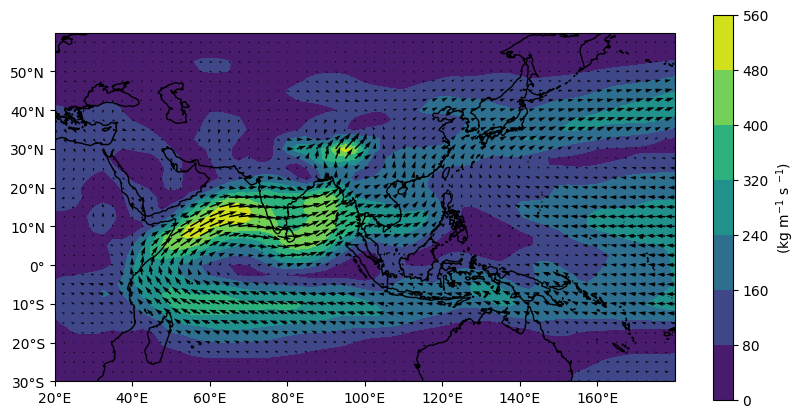

In [100]:
ds = xr.open_mfdataset('/mnt/f/测试练习数据/NCAR-1/*.nc')
## 提取夏季数据并聚合时间维度
months = [6, 7, 8]
u = ds['uwnd'].sel(time = slice('1951-01-01','1999-12-31')).where(ds['time.month'].isin(months), drop=True)[:,9:,:,:].mean(axis=0)
v = ds['vwnd'].sel(time = slice('1951-01-01','1999-12-31')).where(ds['time.month'].isin(months), drop=True)[:,9:,:,:].mean(axis=0)
q = ds['shum'].sel(time = slice('1951-01-01','1999-12-31')).where(ds['time.month'].isin(months), drop=True)[:,9:,:,:].mean(axis=0)*10**-3 #单位

# 计算水平水汽通量
g = 9.8
uq = u*q/g
vq = v*q/g

level = ds.level[9:]*100   #300hpa之后的数据
level = np.expand_dims(level, axis=(1,2)).repeat(u.shape[1], axis=1).repeat(u.shape[2], axis=2)


# 计算整层水汽通量
iuq = np.trapz(uq, x=level, axis=0)
ivq = np.trapz(vq, x=level, axis=0)

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
c = ax.contourf(u.lon,u.lat,np.sqrt(iuq**2+ivq**2), camp='GnBu',transform=ccrs.PlateCarree())   #水汽通量强度
Q = ax.quiver(u.lon,u.lat, iuq,ivq, color="k",linewidth=0.1)
lon_formatter=LongitudeFormatter()
lat_formatter=LatitudeFormatter()
ax.set_extent([20,180,-30, 60],crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(20,180,20),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,60,10),crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
fig.colorbar(c, ax=ax,label='(kg m$^{-1}$ s $^{-1}$)')
plt.show()

## 散度公式  
$D = \frac{1}{g} \nabla \cdot q \vec{V}$


/home/chenzhe/miniconda3/envs/pyleo/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'camp'
  result = super().contourf(*args, **kwargs)


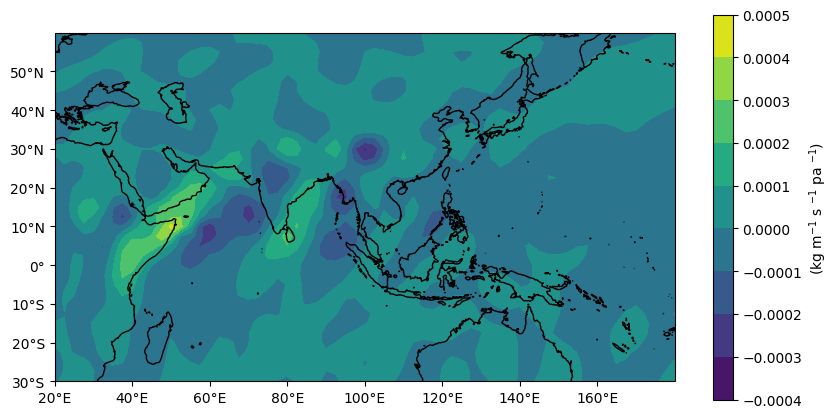

In [104]:
# 计算水汽通量散度
div_q= (uq.differentiate('lon')+vq.differentiate('lon'))/9.8
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
c = ax.contourf(u.lon,u.lat,div_q[6,:,:], camp='GnBu',transform=ccrs.PlateCarree())   #单层水汽通量散度
lon_formatter=LongitudeFormatter()
lat_formatter=LatitudeFormatter()
ax.set_extent([20,180,-30, 60],crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(20,180,20),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,60,10),crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
fig.colorbar(c, ax=ax,label='(kg m$^{-1}$ s $^{-1}$ pa $^{-1}$)')
plt.show()